In [1]:
import torch 
import numpy as np
from matplotlib import pyplot

In [2]:
l = 10
k = 0.89
T_left = 100
T_right = 200
total_sim_time = 10

dx = 0.1
x_vector = np.linspace(0,l,int(l/dx))
dt = 0.0001
t_vector = np.linspace(0,total_sim_time,int(total_sim_time/dt))

In [3]:
u = np.zeros([len(t_vector),len(x_vector)])  # meshgrid 
u[:,0] = T_left
u[:,-1]  = T_right
 

In [18]:
for t in range(0,len(t_vector)-1):
    for x in range(1,len(x_vector)-1):
        u[t+1,x] = ((k*dt/dx**2)* (u[t,x+1]-2*u[t,x] + u[t,x-1])) + u[t,x]

In [5]:
u

array([[1.00000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+02],
       [1.00000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+02],
       [1.00000000e+02, 8.90000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.78000000e+00, 2.00000000e+02],
       ...,
       [1.00000000e+02, 8.74501929e-01, 7.64753623e-03, ...,
        1.52950725e-02, 1.74900386e+00, 2.00000000e+02],
       [1.00000000e+02, 8.74501929e-01, 7.64753623e-03, ...,
        1.52950725e-02, 1.74900386e+00, 2.00000000e+02],
       [1.00000000e+02, 8.74501929e-01, 7.64753623e-03, ...,
        1.52950725e-02, 1.74900386e+00, 2.00000000e+02]])

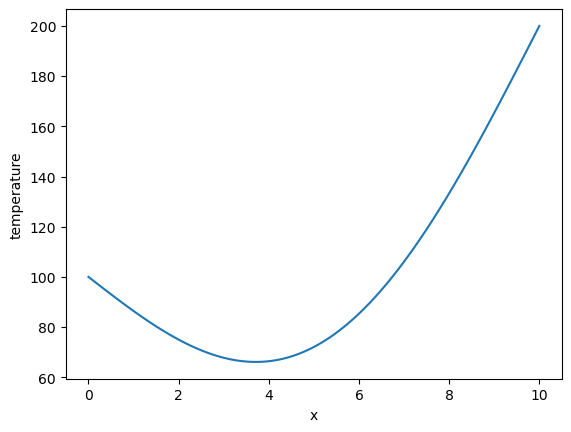

In [20]:
pyplot.plot(x_vector,u[len(t_vector)-1,:])
pyplot.ylabel('temperature')
pyplot.xlabel('x')
pyplot.show()

* Burgers equation

In [21]:
nt = 500
nx = 51
ny = 51

nu = 0.1
dt = 0.001

dx = 2/(nx-1)
dy = 2/(ny-1)

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)


u = np.ones((ny,nx))
v = np.ones((ny,nx))

uf = np.ones((nt,ny,nx))
vf = np.ones((nt,ny,nx))

u[int(0.75/dy):int(1.25/dy +1), int(0.75/dy):int(1.25/dy +1)] = 5
v[int(0.75/dy):int(1.25/dy +1), int(0.75/dy):int(1.25/dy +1)] = 5

uf[0,int(0.75/dy):int(1.25/dy +1), int(0.75/dy):int(1.25/dy +1)] = 5
vf[0,int(0.75/dy):int(1.25/dy +1), int(0.75/dy):int(1.25/dy +1)] = 5

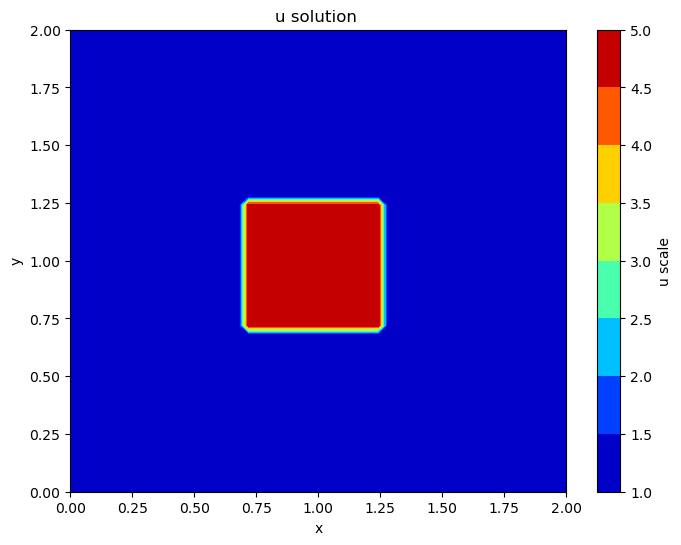

In [22]:
import matplotlib.pyplot as plt 
X,Y = np.meshgrid(x,y)


plt.figure(figsize=(8,6))

contour = plt.contourf(X,Y,u[:],cmap ='jet')
plt.title('u solution ')
plt.xlabel('x')
plt.ylabel('y')

colorbar = plt.colorbar(contour)
colorbar.set_label('u scale')


In [23]:
for n in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1): 
            u[i,j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))-vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[n,i,j] = u[i,j]
            vf[n,i,j] = v[i,j]
    u[:,0 ] = 1
    u[:,-1] = 1
    u[0,: ] = 1
    u[-1,:] = 1
    v[:,0 ] = 1
    v[:,-1] = 1
    v[0,: ] = 1
    v[-1,:] = 1        